** Use SQLAlchemy `create_engine` to connect to your sqlite database. ** 

In [1]:
# SQL Alchemy
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


** Use SQLAlchemy `create_engine` to connect to your sqlite database. **

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite')
conn = engine.connect()

** Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total. **

In [4]:
from datetime import datetime
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [5]:
success = "no"

while success == "no":
    start_date = str(pd.to_datetime(input('Enter the departure date (mm-dd-yyyy)')))[0:10]

    end_date = str(pd.to_datetime(input('Enter the return date (mm-dd-yyyy)')))[0:10]

    if days_between(start_date,end_date) <= 15 and days_between(start_date,end_date) >=3:
        print("Bon Voyage.  Enjoy your " + str(days_between(start_date,end_date)) + " day trip")
        success = "yes"
    else:
        print("ERROR: Your vacation must be between 3 and 15 days. Please re-enter your departure and return dates")
        success = "no"

Enter the departure date (mm-dd-yyyy)01-01-2015
Enter the return date (mm-dd-yyyy)01-10-2015
Bon Voyage.  Enjoy your 9 day trip


** Design a query to retrieve the last 12 months of precipitation data. **

In [6]:
data4 = pd.read_sql("SELECT date, prcp, tobs FROM measurement",conn)
data4['date'] = pd.to_datetime(data4['date'])
data4['start_date'] = data4['date'].apply(lambda x: x - pd.DateOffset(years=1))
data4.head()

end_date = data4['date'].max()
start_date = data4['start_date'].max()
start_date


last_year = data4.loc[data4['date']>= start_date]
last_year.head()

,date,prcp,tobs,start_date
2326,2016-08-23,0.00,81,2015-08-23
2327,2016-08-24,0.08,79,2015-08-24
2328,2016-08-25,0.08,80,2015-08-25
2329,2016-08-26,0.00,79,2015-08-26
2330,2016-08-27,0.00,77,2015-08-27


** Select only the `date` and `prcp` values. **
** Load the query results into a Pandas DataFrame and set the index to the date column. **

In [7]:
last_year = last_year.drop(["start_date"],axis=1)
last_year = last_year.drop(["tobs"],axis=1)
last_year = last_year.set_index('date')
last_year.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


** Plot the results using the DataFrame `plot` method. **

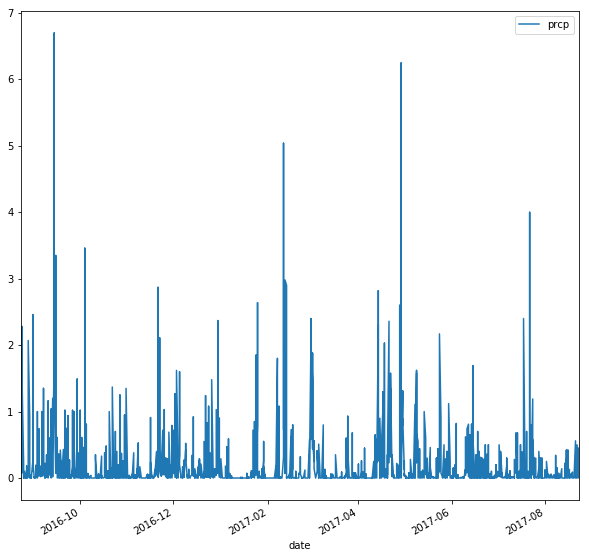

In [8]:
last_year.plot(figsize=(10,10))
plt.show()

** Use Pandas to print the summary statistics for the precipitation data. **

In [9]:
last_year.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


** Design a query to calculate the total number of stations. **
** Design a query to find the most active stations. List the stations and observation counts in descending order
Which station has the highest number of observations?
**

In [10]:
data2 = pd.read_sql("SELECT station, COUNT(tobs) as 'instances' FROM measurement GROUP BY station ORDER BY instances DESC;",conn)
data2

,station,instances
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


** USC00519281 is the most active station. There are a total of 9 stations.**

** Design a query to retrieve the last 12 months of temperature observation data (tobs). **

In [11]:
data4 = pd.read_sql("SELECT station, date, prcp, tobs FROM measurement",conn)
data4['date'] = pd.to_datetime(data4['date'])
data4['NEW_DATE'] = data4['date'].apply(lambda x: x - pd.DateOffset(years=1))
start_date = data4['NEW_DATE'].max()
start_date

Timestamp('2016-08-23 00:00:00')

In [12]:
last_12 = data4.loc[data4['date'] >= start_date]
last_12.head()

,station,date,prcp,tobs,NEW_DATE
2326,USC00519397,2016-08-23,0.00,81,2015-08-23
2327,USC00519397,2016-08-24,0.08,79,2015-08-24
2328,USC00519397,2016-08-25,0.08,80,2015-08-25
2329,USC00519397,2016-08-26,0.00,79,2015-08-26
2330,USC00519397,2016-08-27,0.00,77,2015-08-27


**  Filter by the station with the highest number of observations. **

In [13]:
last_12 = last_12.loc[last_12['station'] == 'USC00519281']
last_12.head()

,station,date,prcp,tobs,NEW_DATE
13335,USC00519281,2016-08-23,1.79,77,2015-08-23
13336,USC00519281,2016-08-24,2.15,77,2015-08-24
13337,USC00519281,2016-08-25,0.06,80,2015-08-25
13338,USC00519281,2016-08-26,0.01,80,2015-08-26
13339,USC00519281,2016-08-27,0.12,75,2015-08-27


In [14]:
last_12['date'] = pd.to_datetime(last_12['date'])
last_12['month'] = last_12['date'].dt.month
last_12_grouped = last_12.groupby(["month"]).mean()
last_12_grouped = last_12_grouped.drop(["prcp"],axis=1)
last_12_grouped

,tobs
month,
1,68.322581
2,68.214286
3,70.612903
4,70.966667
5,73.096774
6,74.766667
7,76.935484
8,77.722222
9,77.766667


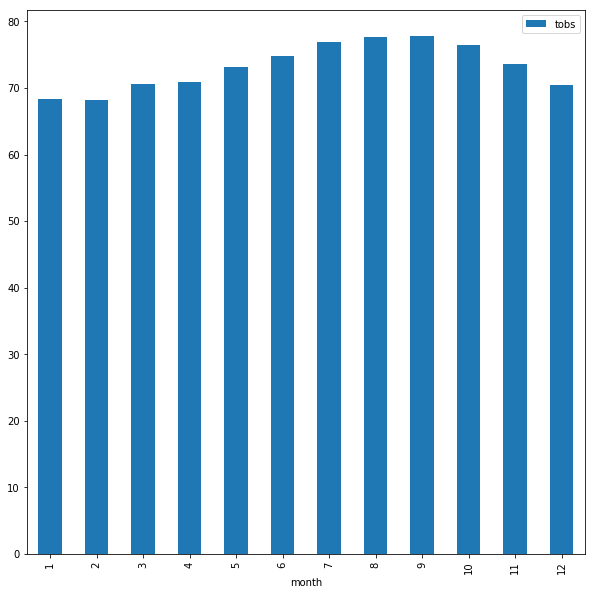

In [15]:
last_12_grouped.plot(figsize=(10,10),kind = 'bar')
plt.show()

** The graph above shows there isn't much temperature variation by month in Hawaii.  Winter highs approach 70 and Summer highs are in the mid 70s. Beautiful all year.  **

** Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.**


In [16]:

start_date = str(pd.to_datetime(input('Enter the start date (mm-dd-yyyy)')))[0:10]

end_date = str(pd.to_datetime(input('Enter the end date (mm-dd-yyyy)')))[0:10]

Enter the departure date (mm-dd-yyyy)01-01-2015
Enter the return date (mm-dd-yyyy)01-10-2015


In [17]:
data4 = pd.read_sql("SELECT date, tobs FROM measurement",conn)
data4['date'] = pd.to_datetime(data4['date'])

after_start = data4['date'] >= start_date
before_end = data4['date'] <= end_date

data5 = data4.loc[data4['date'] >= start_date]
data6 = data5.loc[data4['date'] <= end_date]
data6

,date,tobs
1731,2015-01-01,63
1732,2015-01-02,65
1733,2015-01-03,62
1734,2015-01-04,58
1735,2015-01-05,58
1736,2015-01-06,64
1737,2015-01-07,63
1738,2015-01-08,64
1739,2015-01-09,64
1740,2015-01-10,65


In [18]:
maximum = data6['tobs'].max()
minimum = data6['tobs'].min()
average = data6['tobs'].mean()
print('The maximum historical temperature from your selected dates is ' +str(maximum) +' degrees.')
print('The minimum historical temperature from your selected dates is ' +str(minimum) +' degrees.')
print('The average historical temperature from your selected dates is ' +str(average) +' degrees.')

The maximum historical temperature from your selected dates is 77 degrees.
The minimum historical temperature from your selected dates is 56 degrees.
The average historical temperature from your selected dates is 65.61971830985915 degrees.


In [19]:
data6_min = data6.groupby(["date"]).min()
data6_min.rename(columns={"tobs":"Min"},inplace=True)
data6_max = data6.groupby(["date"]).max()
data6_max.rename(columns={"tobs":"Max"},inplace=True)
data6_mean = data6.groupby(["date"]).mean()
data6_mean.rename(columns={"tobs":"Mean"},inplace=True)
data6_min.reset_index(inplace=True)
data6_max.reset_index(inplace=True)
data6_mean.reset_index(inplace=True)

merged = pd.merge(data6_min, data6_max, on="date", how="left")
merged = pd.merge(data6_mean, merged, on="date", how="left")
merged.set_index('date',inplace=True)
merged

,Mean,Min,Max
date,,,
2015-01-01,65.833333,63,71
2015-01-02,65.428571,60,72
2015-01-03,66.428571,62,72
2015-01-04,64.714286,58,72
2015-01-05,60.285714,56,73
2015-01-06,66.375000,63,72
2015-01-07,65.875000,57,70
2015-01-08,65.250000,57,74
2015-01-09,66.875000,62,75


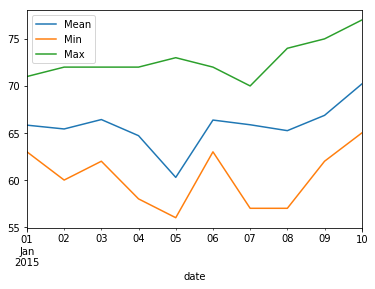

In [20]:
merged.plot()
plt.show()